In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import random as r
import matplotlib.pyplot as plt
from random import randrange as rr
import matplotlib.colors as colors
from matplotlib.animation import FuncAnimation
from numba import njit

In [10]:
@njit
def sand_randomizer(matrix,spread,N):
    for i in range(N):
        for j in range(N):
            matrix[i][j] = matrix[i][j] + rr(spread)
    return matrix

class sand():
    def __init__(self,size,speed = 10,spread = False, max_dust = 4, mode = 'random'):
        self.mode = mode
        self.max_dust = max_dust
        self.speed = 100/speed
        self.size = size
        self.matrix = np.zeros((self.size ,self.size), dtype=None)
        if spread == 'low':
            self.matrix = sand_randomizer(self.matrix,max_dust,self.size)
        if spread == 'high':
            self.matrix = sand_randomizer(self.matrix,max_dust-1,self.size)+1
            
    def sand_sim(self):
        %matplotlib notebook
        sand = 0
        sand_list = []
        matrix_list = []
        cascade_list = [0]
        cascade = 0
        while len(sand_list) < 5000:
            if (self.matrix > (self.max_dust-1)).any() == True:
                cascade += 1
                indices = np.where(self.matrix > (self.max_dust-1))
                sand_list.append(sand)
                matrix_list.append(np.copy(self.matrix))
                self.matrix[indices] -= self.max_dust
                i, j = indices
                up_limit = i < self.size-1
                low_limit = i > 0
                left_limit = j > 0
                right_limit = j < self.size-1
                self.matrix[i[up_limit]+1, j[up_limit]] += 1
                self.matrix[i[low_limit]-1, j[low_limit] - 0] += 1
                self.matrix[i[left_limit], j[left_limit]-1] += 1
                self.matrix[i[right_limit], j[right_limit]+1] += 1
                if cascade > max(cascade_list):
                    cascade_list.append(cascade)
                else:
                    cascade_list.append(max(cascade_list))
                continue
            else:
                cascade = 0
                if self.mode == 'center':
                     self.matrix[int(self.size/2)][int(self.size/2)] += 1
                if self.mode == 'corners':
                    self.matrix[0][0] += 1
                    self.matrix[self.size-1][self.size-1] += 1
                    self.matrix[self.size-1][0] += 1
                    self.matrix[0][self.size-1] += 1
                if self.mode == 'random':
                    self.matrix[rr(self.size)][rr(self.size)] += 1
                sand += 1
                sand_list.append(sand)
                matrix_list.append(np.copy(self.matrix))      
        fig, ax = plt.subplots() 
        color_map = colors.ListedColormap(['#FFFFFF', '#E6E6E6', '#808080', '#333333', 'red'])
        im_plot = ax.imshow(matrix_list[0],cmap=color_map, vmin=0, vmax=self.max_dust)
        cbar = fig.colorbar(im_plot,ticks=np.arange(0,self.max_dust+1,1),shrink=0.7)
        cbar.set_label('Amount of sand',rotation=90)
        sand_counter = ax.text(self.size/3,-self.size/10,f'Sand dropped = {sand_list[0]}')
        max_cascade = ax.text(self.size/3,-self.size/20,f'Longest cascade = {cascade_list[0]}')

        def animate(i):
            im_plot.set_data(matrix_list[i])
            sand_counter.set_text(f'Sand dropped = {sand_list[i]}')
            max_cascade.set_text(f'Longest cascade = {cascade_list[i]}')
            return im_plot, sand_counter,max_cascade

        animation = FuncAnimation(fig, func=animate, frames=np.arange(0, len(sand_list), 1), interval=self.speed,blit=True,cache_frame_data=True)
        plt.axis('off')
        return animation

<IPython.core.display.Javascript object>


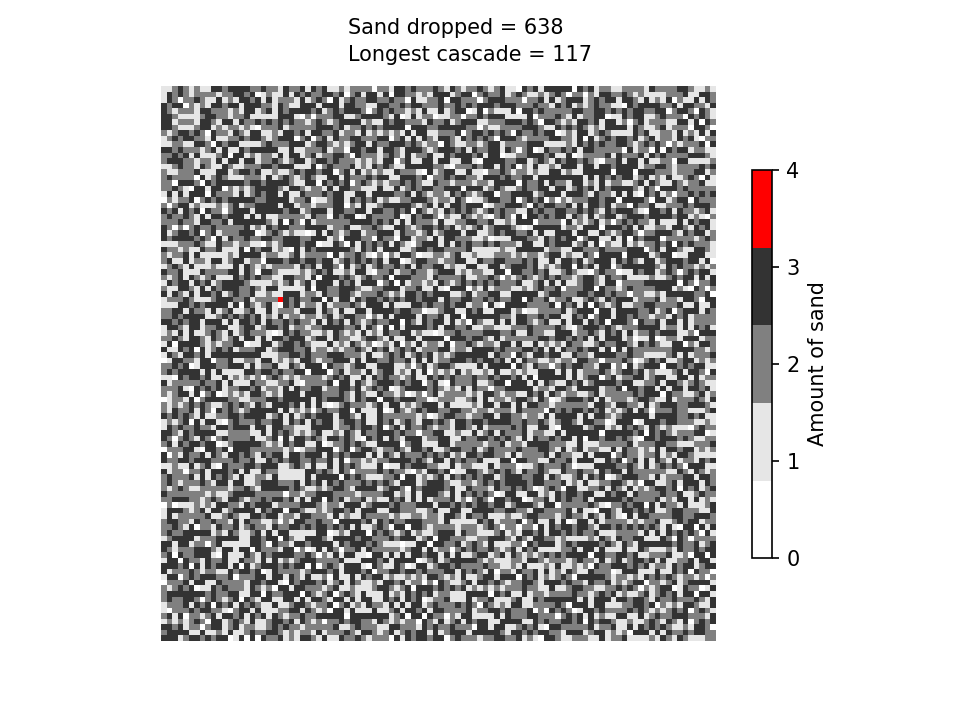

In [11]:
Test = sand(size = 100, speed = 10,spread='high')
Test.sand_sim()

1.0


In [170]:
def sand_randomizer(matrix,spread,N):
    for i in range(N):
        for j in range(N):
            matrix[i][j] = matrix[i][j] + rr(spread)
    return matrix

class sand():
    def __init__(self,size,speed = 10,spread = False, max_dust = 4, mode = 'random'):
        self.mode = mode
        self.max_dust = max_dust
        self.speed = 100/speed
        self.size = size
        self.matrix = np.zeros((self.size ,self.size), dtype=None)
        if spread == 'low':
            self.matrix = sand_randomizer(self.matrix,max_dust,self.size)
        if spread == 'high':
            self.matrix = sand_randomizer(self.matrix,max_dust-1,self.size)+1
        
    def sand_sim(self):
        %matplotlib notebook
        sand = 0
        sand_list = []
        matrix_list = []
        cascade_list = [0]
        cascade = 0
        while len(sand_list) < 5000:
            if (self.matrix > (self.max_dust-1)).any() == True:
                cascade += 1
                indices = np.where(self.matrix > (self.max_dust-1))
                i_sets = [(indices[0][i], indices[1][i]) for i in range(len(indices[0]))]
                for i_set in i_sets:
                    i,j = i_set
                    sand_list.append(sand)
                    matrix_list.append(np.copy(self.matrix))
                    self.matrix[i][j] -= 4
                    if i < self.size-1:
                        self.matrix[i+1][j] += 1
                    if i > 0:
                        self.matrix[i-1][j] += 1
                    if j < self.size-1:
                        self.matrix[i][j+1] += 1                 
                    if j > 0:
                        self.matrix[i][j-1] += 1  
                if cascade > max(cascade_list):
                    cascade_list.append(cascade)
                else:
                    cascade_list.append(max(cascade_list))
                continue
            else:
                cascade = 0
                if self.mode == 'center':
                     self.matrix[int(self.size/2)][int(self.size/2)] += 1
                if self.mode == 'corners':
                    self.matrix[0][0] += 1
                    self.matrix[self.size-1][self.size-1] += 1
                    self.matrix[self.size-1][0] += 1
                    self.matrix[0][self.size-1] += 1
                if self.mode == 'random':
                    self.matrix[rr(self.size)][rr(self.size)] += 1
                sand += 1
                sand_list.append(sand)
                matrix_list.append(np.copy(self.matrix))      
        fig, ax = plt.subplots() 
        color_map = colors.ListedColormap(['#FFFFFF', '#E6E6E6', '#808080', '#333333', 'red'])
        im_plot = ax.imshow(matrix_list[0],cmap=color_map, vmin=0, vmax=self.max_dust)
        cbar = fig.colorbar(im_plot,ticks=np.arange(0,self.max_dust+1,1),shrink=0.7)
        cbar.set_label('Amount of sand')
        sand_counter = ax.text(self.size/3,-self.size/10,f'Sand dropped = {sand_list[0]}')
        max_cascade = ax.text(self.size/3,-self.size/20,f'Longest cascade = {cascade_list[0]}')

        def animate(i):
            im_plot.set_data(matrix_list[i])
            sand_counter.set_text(f'Sand dropped = {sand_list[i]}')
            max_cascade.set_text(f'Longest cascade = {cascade_list[i]}')
            return im_plot, sand_counter,max_cascade

        animation = FuncAnimation(fig, func=animate, frames=np.arange(0, len(sand_list), 1), interval=self.speed,blit=True)
        plt.axis('off')
        return animation

In [299]:
test = (np.array([0, 1, 1, 2, 3]), np.array([3, 0, 2, 3, 1]))

arr_list = [(test[0][i], test[1][i]) for i in range(len(test[0]))]
print(arr_list)


[(0, 3), (1, 0), (1, 2), (2, 3), (3, 1)]
